In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [5]:
df = pd.read_csv("data_sets/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [26]:
'''
X_train.shape: (800, 11)
X_test.shape: (200, 11)
y_train: (800,)
'''
X = df.drop(['custcat'], axis=1)
y = df['custcat']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [31]:
# Train model and predict
k = 4
neighbors = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
predict_y = neighbors.predict(X_test)
print("Acuaricy of model at K=4 is:",metrics.accuracy_score(y_test, predict_y))

Acuaricy of model at K=4 is: 0.32


Minimum error:- 0.59 at K = 37


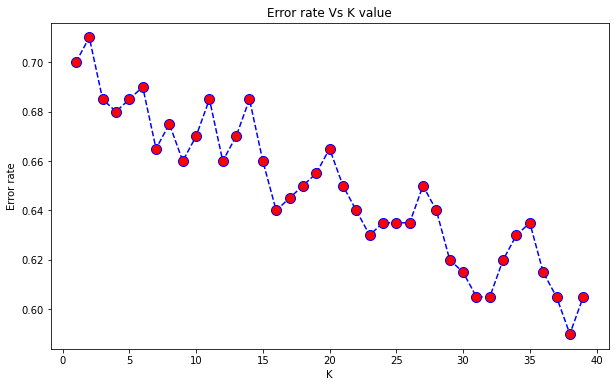

In [28]:
# Improve the model and find out the optimal K value
error_rate = []

"""
Where 40 is the top for K, selected for us.
"""
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))
    

'''
plot error rate Vs K value
'''
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', 
        marker='o', markerfacecolor='red', markersize = 10)
plt.title('Error rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))



Maximum accuracy:- 0.41 at K = 37


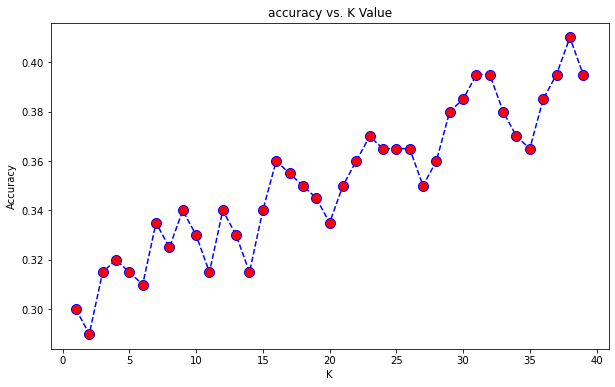

In [29]:
'''
Acuaricy Vs K value
'''

acc = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, predict_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
    

